In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
pip install wquantiles

In [ ]:
import wquantiles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/DataScience/housing.csv", delimiter="\s+", header=None)

In [ ]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data.columns = column_names

In [ ]:
# Convert columns to appropriate numeric data types
data = data.apply(pd.to_numeric, errors="coerce")

In [ ]:
# Check data types again
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [ ]:
# Display first 10 rows of it
print(data.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

In [17]:
type(data)

pandas.core.frame.DataFrame

In [29]:
# Display mean value of CRIM  input column
data['CRIM'].mean()

3.613523557312254

In [28]:
# Display mean value of all the input columns
mean_values = data.mean()
print("Mean Values:")
print(mean_values)

Mean Values:
CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64


In [22]:
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

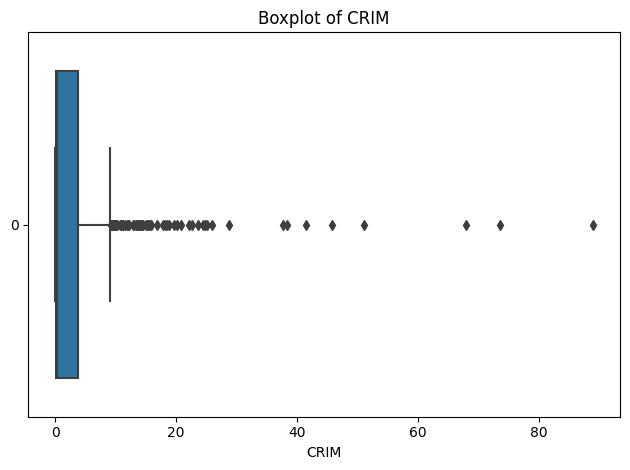

In [23]:
# plot individual boxplots for each
sns.boxplot(data=data["CRIM"], orient="h")
plt.title("Boxplot of CRIM")
plt.xlabel("CRIM")
plt.tight_layout()
plt.show()

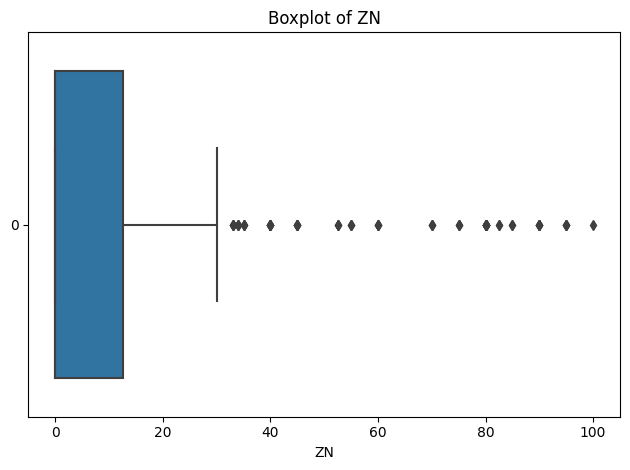

In [24]:
sns.boxplot(data=data["ZN"], orient="h")
plt.title("Boxplot of ZN")
plt.xlabel("ZN")

plt.tight_layout()
plt.show()

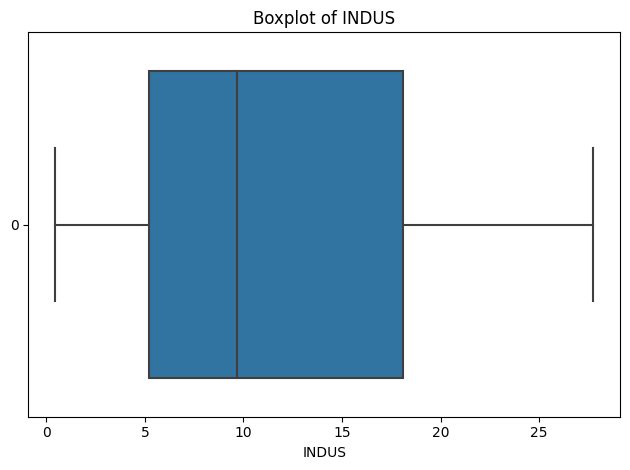

In [25]:
sns.boxplot(data=data["INDUS"], orient="h")
plt.title("Boxplot of INDUS")
plt.xlabel("INDUS")
plt.tight_layout()
plt.show()

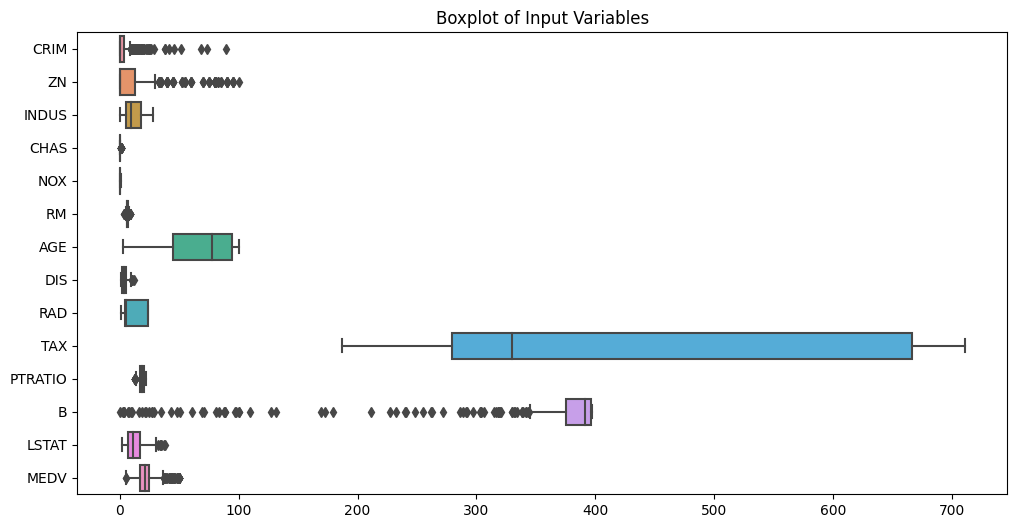

In [27]:
#This piece of code was taken from Google-bcz-i-have-no-idea-about-how-to-plot-all-colums-boxplot-in-one-box


# Display deviation of all input columns using Boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Input Variables")
plt.show()

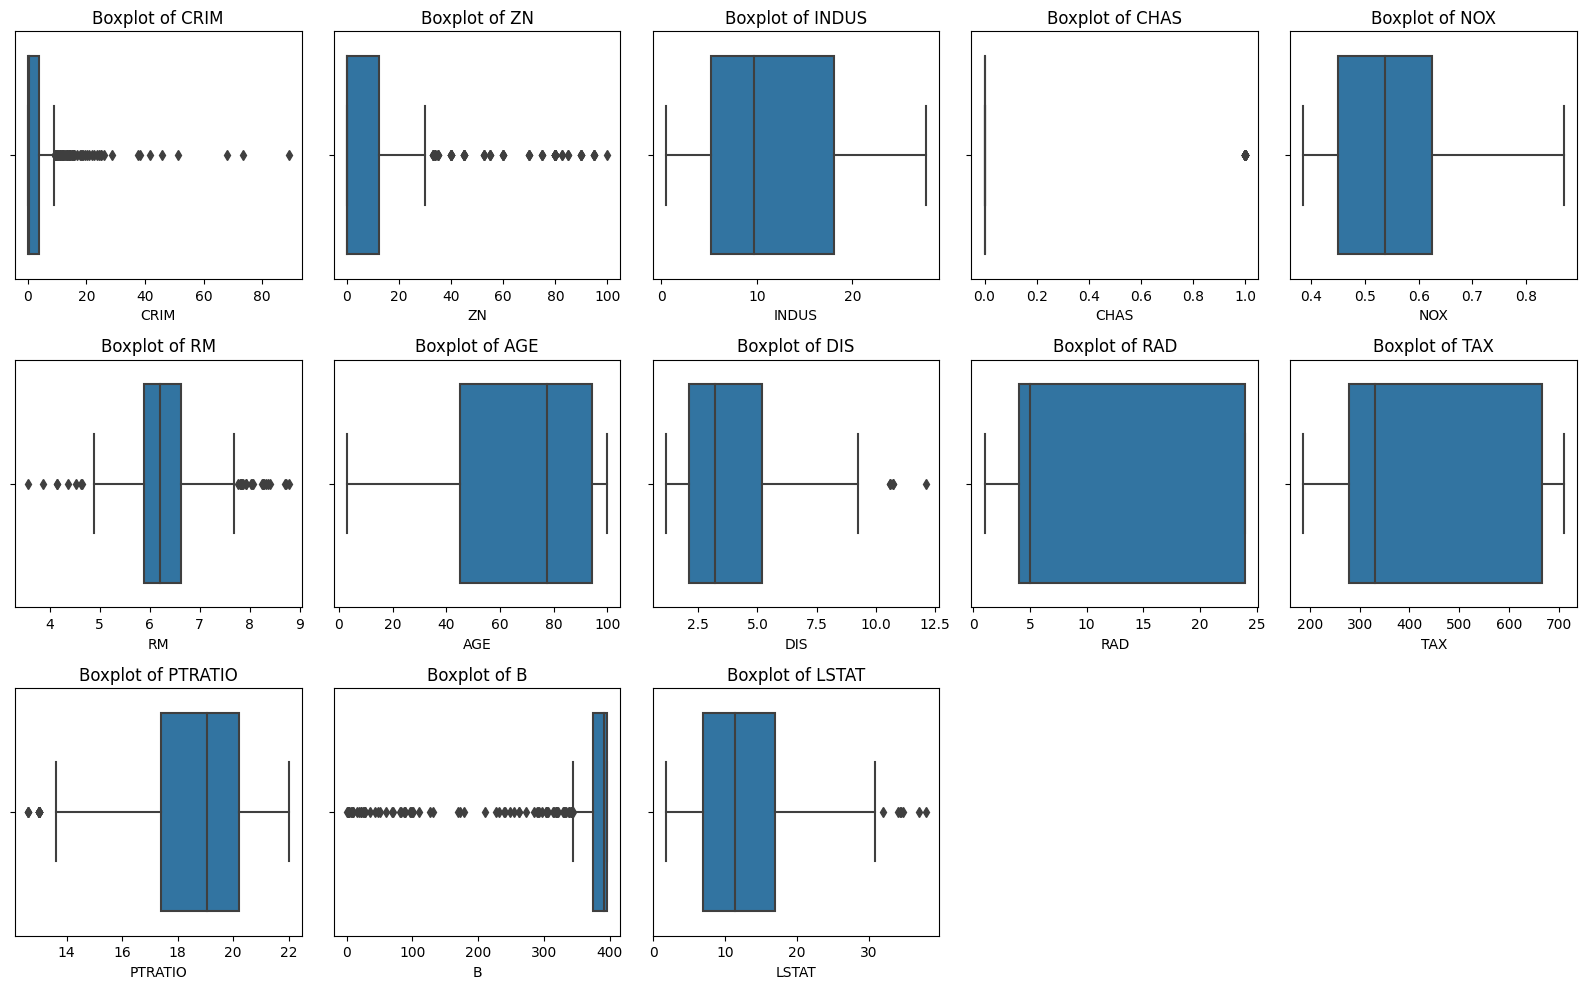

In [26]:
#take-from-google-because-i-can't-understand-how-to-use-loop-in-panada-to-display-all-inputs-boxplot


# Display deviation of each input column using separate Boxplot visualizations
plt.figure(figsize=(16, 10))

# Iterate through the numeric columns and create individual boxplots
for i, column in enumerate(data.columns[:-1]):  # Exclude the last column (output variable MEDV)
    plt.subplot(3, 5, i + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=data[column], orient="h")
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
#Estimate correlation of each input variable with output,
correlation_matrix = data.corr()
correlation_with_output = correlation_matrix["MEDV"].abs().sort_values(ascending=False)
print("Correlation with Output (MEDV):")
print(correlation_with_output)

Correlation with Output (MEDV):
MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


In [30]:
#  list five most important variables based on the correlation
top_5_correlated = correlation_with_output[1:6]
print("Top 5 Correlated Variables with MEDV:")
print(top_5_correlated)

Top 5 Correlated Variables with MEDV:
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: MEDV, dtype: float64


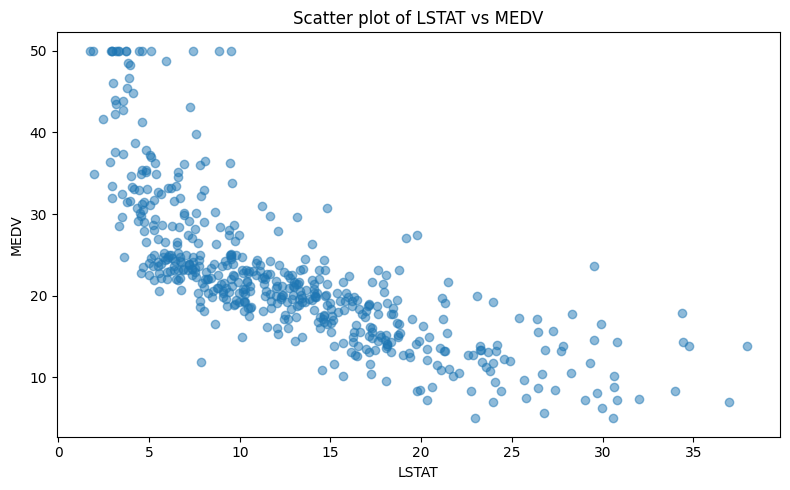

In [32]:
# Draw scatter plot for the first correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[0]], data["MEDV"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[0]} vs MEDV")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


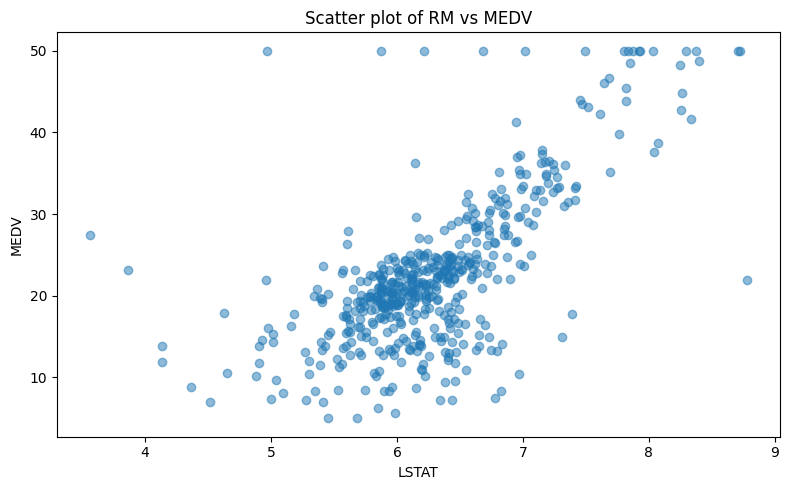

In [35]:
# Draw scatter plot for the Second correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[1]], data["MEDV"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[1]} vs MEDV")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


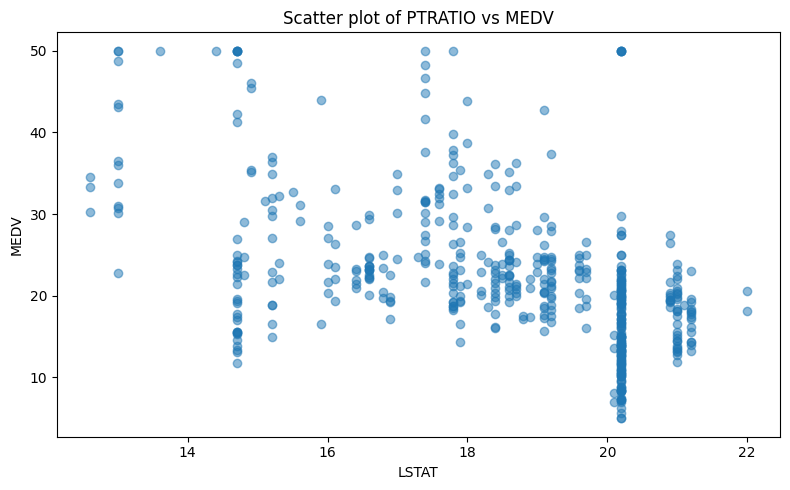

In [39]:
# Draw scatter plot for the Third correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[2]], data["MEDV"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[2]} vs MEDV")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


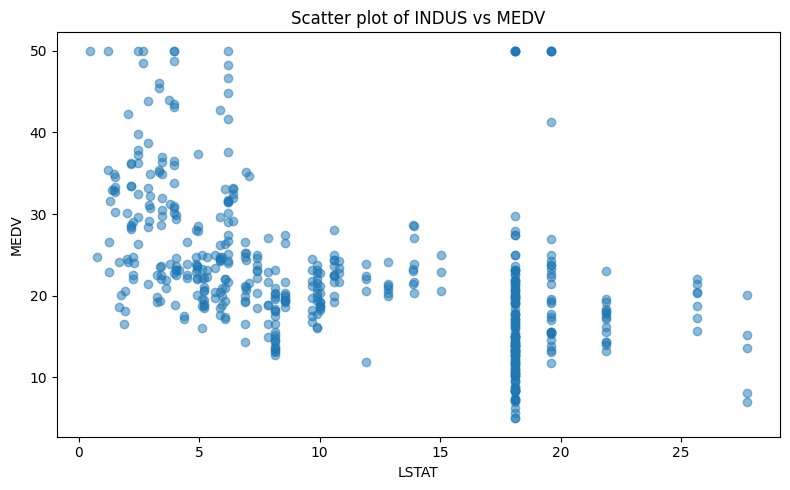

In [41]:
# Draw scatter plot for the Fouth correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[3]], data["MEDV"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[3]} vs MEDV")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


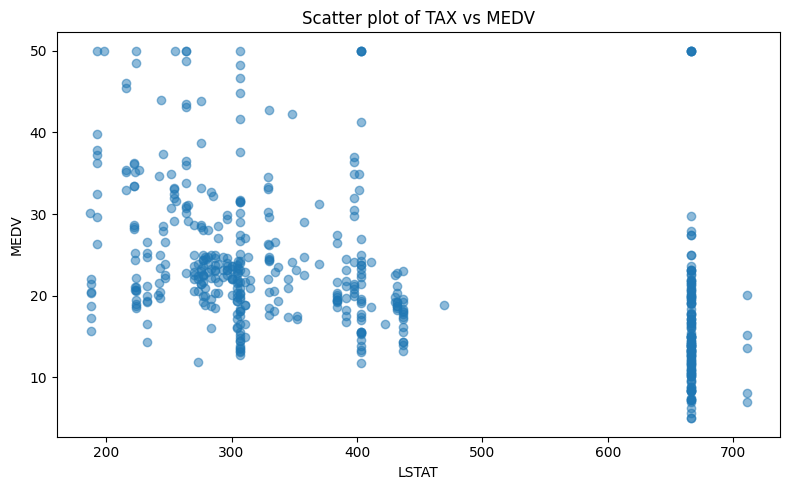

In [42]:
# Draw scatter plot for the Fifth correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[4]], data["MEDV"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[4]} vs MEDV")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


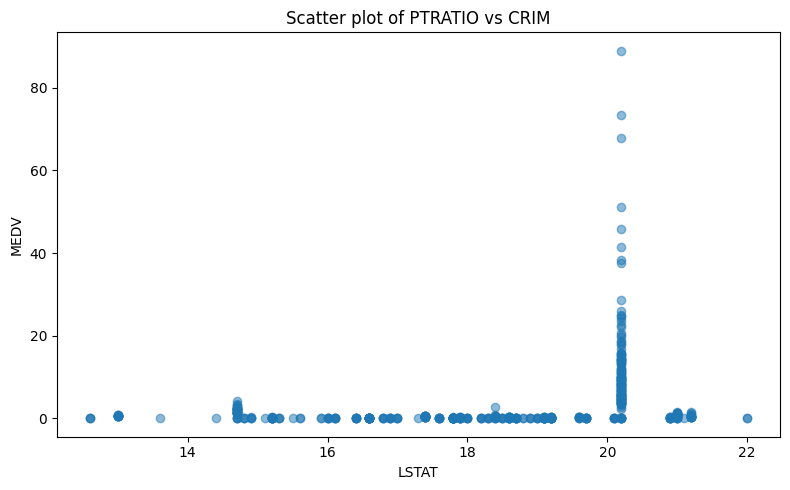

In [40]:
# Draw scatter plot for the Third correlated variable
plt.figure(figsize=(8, 5))
plt.scatter(data[top_5_correlated.index[2]], data["CRIM"], alpha=0.5)
plt.title(f"Scatter plot of {top_5_correlated.index[2]} vs CRIM")
plt.xlabel(top_5_correlated.index[0])
plt.ylabel("MEDV")
plt.tight_layout()
plt.show()


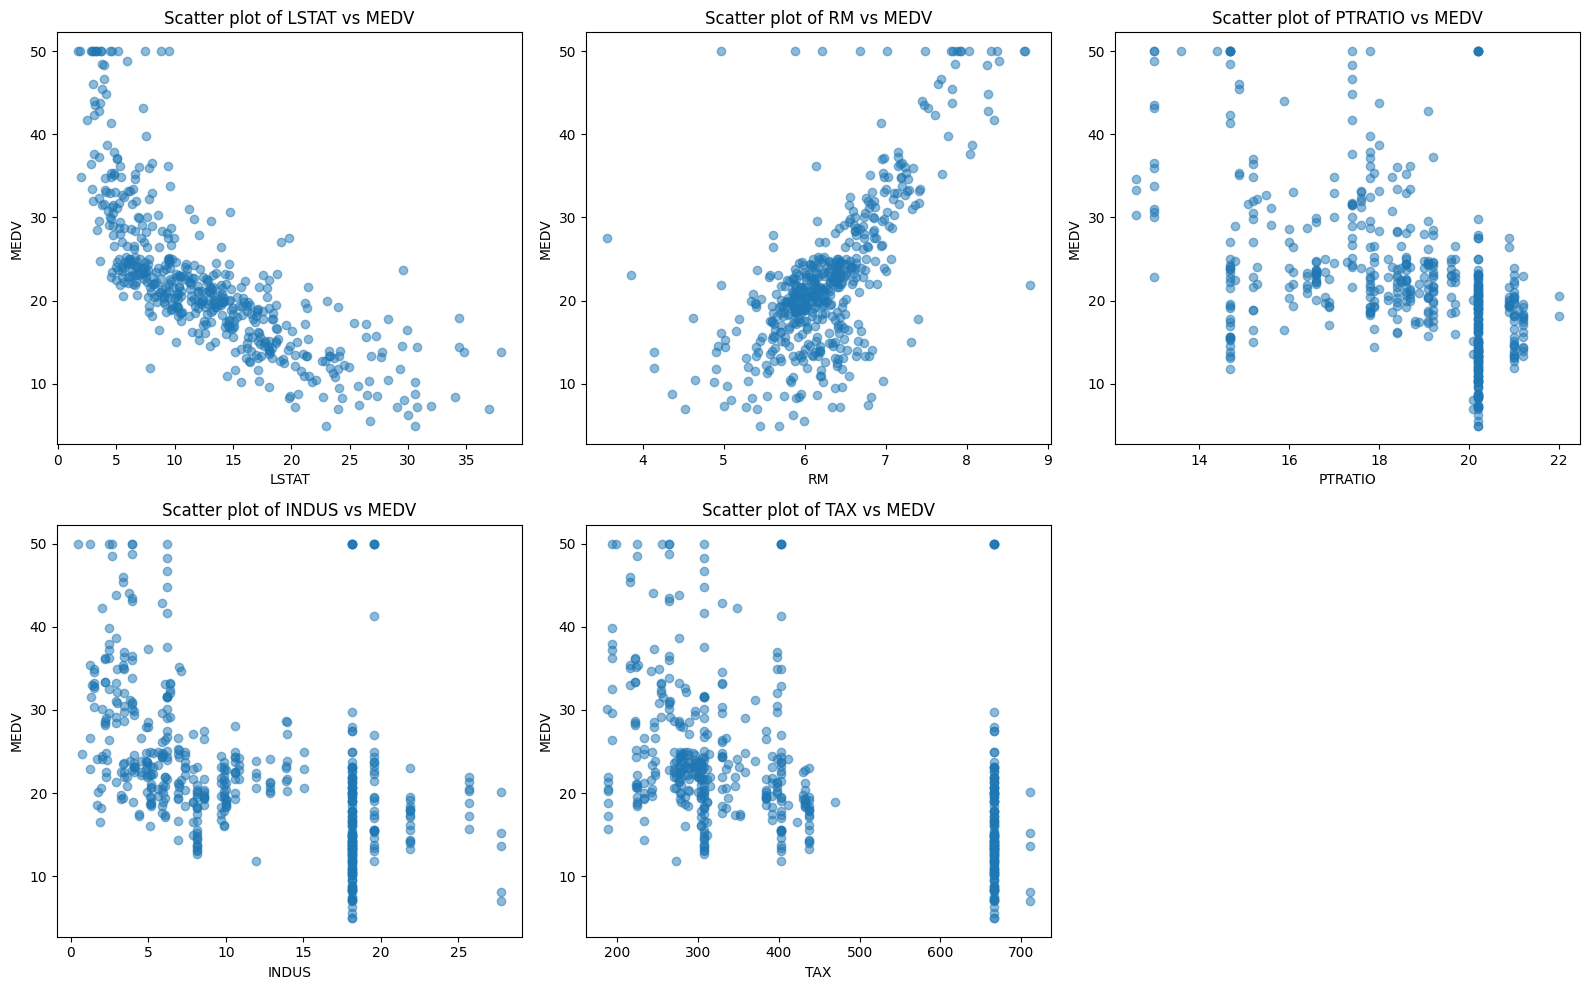

In [31]:
#take-from-google-because-i-can't-understand-how-to-use-loop-in-panada-to-display

#Draw five scatter plots to show correlation between each of the above five variables and output
plt.figure(figsize=(16, 10))
for i, variable in enumerate(top_5_correlated.index):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[variable], data["MEDV"], alpha=0.5)
    plt.title(f"Scatter plot of {variable} vs MEDV")
    plt.xlabel(variable)
    plt.ylabel("MEDV")
plt.tight_layout()
plt.show()